# Carolina dos Anjos Figueiredo - GU3015475

## Projeto - Tópicos Especiais II

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, export_text
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

## Dataset Cursos IFSP
### Período do Dataset: primeiro semestre 2023.
### Data de atualização: março 2023


### Problema:
- Analisar o desempenho dos valores do ENADE, CPC e CC dos cursos oferecidos nos campus do Instituto Federal de São Paulo (IFSP)

* ENADE (Exame Nacional de Desempenho dos Estudantes) - avalia o desempenho dos estudantes concluintes nos cursos de graduação.
* CPC (Conceito Preliminar de Curso) - é um indicador de qualidade na avaliação dos cursos de graduação
* CC (Conceito de Curso) - Antecede o CPC - é a nota final atribuída durante o processo de avaliação de um curso previsto no Sistema Nacional de Avaliação da Educação Superior (Sinaes)

### Extração

In [ ]:
cursos = pd.read_csv('ifsp_cursos2023.csv') # dataset CURSOS IFSP 2023

### Exploração do Dataset:

In [ ]:
cursos.head() # mostra as primeiras 5 linhas

,CÓDIGO DA IES,NOME DA IES,SITUACAO DA IES,CÓDIGO DO CURSO,CÓDIGO DA DENOMINAÇÃO,MARCAÇÃO DA DENOMINAÇÃO,NOME DO CURSO,DATA DE CADASTRO DO CURSO,GRAU,CÓDIGO CINE RÓTULO,...,VALOR CC,ANO CC,CPC FAIXA,CPC CONTINUO,CPC ANO,VALOR ENADE,ENADE ANO,NOME COORDENADOR CURSO,SINALIZAÇÕES DA IES,SINALIZAÇÕES DE CURSO
0,1810,"INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNO...",Ativa,1518897,5342,NaN,PEDAGOGIA EM EDUCAÇÃO PROFISSIONAL E TECNOLÓGICA,27/02/2020,Licenciatura,0113P01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Andreza Silva Areao,NaN,NaN
1,1810,"INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNO...",Ativa,1128375,36,DENOMINAÇÃO UTILIZADA PELO SISTEMA/CATÁLOGO,MATEMÁTICA,13/10/2010,Licenciatura,0114M01,...,4.0,2016.0,4.0,333.0,2021.0,4.0,2021.0,José Érick De Souza Lima,NaN,NaN
2,1810,"INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNO...",Ativa,1400668,3911,DENOMINAÇÃO UTILIZADA PELO SISTEMA/CATÁLOGO,LETRAS - PORTUGUÊS E INGLÊS,23/05/2017,Licenciatura,0115L15,...,5.0,2022.0,4.0,353.0,2021.0,4.0,2021.0,Patricia Horta,NaN,NaN
3,1810,"INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNO...",Ativa,1263236,5187,NaN,FORMAÇÃO PEDAGÓGICA DE DOCENTES PARA A EDUCAÇÃ...,13/04/2016,Licenciatura,0113F01,...,4.0,2018.0,NaN,NaN,NaN,NaN,NaN,Fl&aacute;vio Biasutti Valadares,NaN,NaN
4,1810,"INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNO...",Ativa,1341356,29,DENOMINAÇÃO UTILIZADA PELO SISTEMA/CATÁLOGO,FÍSICA,12/11/2015,Licenciatura,0114F02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cursos.info() # Exibe informações sobre as variáveis e seus tipos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 71 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   CÓDIGO DA IES                               227 non-null    int64  
 1   NOME DA IES                                 227 non-null    object 
 2   SITUACAO DA IES                             227 non-null    object 
 3   CÓDIGO DO CURSO                             227 non-null    int64  
 4   CÓDIGO DA DENOMINAÇÃO                       227 non-null    int64  
 5   MARCAÇÃO DA DENOMINAÇÃO                     178 non-null    object 
 6   NOME DO CURSO                               227 non-null    object 
 7   DATA DE CADASTRO DO CURSO                   227 non-null    object 
 8   GRAU                                        227 non-null    object 
 9   CÓDIGO CINE RÓTULO                          227 non-null    object 
 10  CINE RÓTULO   

In [ ]:
cursos.describe() # Exibe estatísticas descritivas para variáveis numéricas

,CÓDIGO DA IES,CÓDIGO DO CURSO,CÓDIGO DA DENOMINAÇÃO,CÓDIGO CINE ÁREA DETALHADA,CÓDIGO CINE ÁREA ESPECÍFICA,CÓDIGO CINE ÁREA GERAL,QT VAGAS AUTORIZADAS,CARGA HORÁRIA,CARGA HORÁRIA DISTÂNCIA,CARGA HORÁRIA ESTÁGIO,...,PROCESSOS EM TRAMITACAO,VALOR CC,ANO CC,CPC FAIXA,CPC CONTINUO,CPC ANO,VALOR ENADE,ENADE ANO,SINALIZAÇÕES DA IES,SINALIZAÇÕES DE CURSO
count,227.0,2.270000e+02,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,203.000000,203.000000,...,9.200000e+01,133.000000,133.000000,87.000000,86.000000,87.000000,89.000000,89.000000,0.0,0.0
mean,1810.0,1.199882e+06,1441.295154,422.814978,41.911894,4.079295,174.096916,2877.140969,27.443350,268.965517,...,2.020502e+08,4.112782,2017.225564,3.735632,319.988372,2019.977011,3.752809,2019.842697,NaN,NaN
std,0.0,5.057366e+05,2092.866057,291.142958,29.098417,2.901459,348.763238,929.928995,118.038257,145.017629,...,1.670738e+05,0.623457,3.797161,0.637214,39.493408,2.246325,0.801715,2.392692,NaN,NaN
min,1810.0,4.823700e+04,1.000000,113.000000,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,2.017152e+08,2.000000,2005.000000,0.000000,209.000000,2009.000000,0.000000,2009.000000,NaN,NaN
25%,1810.0,1.168204e+06,63.000000,114.000000,11.000000,1.000000,40.000000,2100.000000,0.000000,160.000000,...,2.019263e+08,4.000000,2015.000000,3.000000,294.250000,2019.000000,3.000000,2019.000000,NaN,NaN
50%,1810.0,1.313172e+06,192.000000,413.000000,41.000000,4.000000,40.000000,3200.000000,0.000000,300.000000,...,2.020183e+08,4.000000,2017.000000,4.000000,320.500000,2021.000000,4.000000,2021.000000,NaN,NaN
75%,1810.0,1.455788e+06,3007.000000,714.000000,71.000000,7.000000,80.000000,3663.000000,0.000000,400.000000,...,2.022077e+08,4.000000,2019.000000,4.000000,343.000000,2021.000000,4.000000,2021.000000,NaN,NaN
max,1810.0,5.001091e+06,5342.000000,1015.000000,101.000000,10.000000,1140.000000,4361.000000,800.000000,420.000000,...,2.023062e+08,5.000000,2023.000000,5.000000,419.000000,2021.000000,5.000000,2021.000000,NaN,NaN


In [ ]:
# Verifica a presença de dados ausentes em cada coluna
print(cursos.isnull().sum())

CÓDIGO DA IES               0
NOME DA IES                 0
SITUACAO DA IES             0
CÓDIGO DO CURSO             0
CÓDIGO DA DENOMINAÇÃO       0
                         ... 
VALOR ENADE               138
ENADE ANO                 138
NOME COORDENADOR CURSO      9
SINALIZAÇÕES DA IES       227
SINALIZAÇÕES DE CURSO     227
Length: 71, dtype: int64


##  Transformação

- Quais colunas serão utilizadas.


In [ ]:
# Definindo as colunas que vão ser utilizadas
df = cursos[['CÓDIGO DO CURSO', 'NOME DO CURSO', 'DATA DE CADASTRO DO CURSO', 'GRAU',
             'CINE RÓTULO', 'CÓDIGO CINE ÁREA ESPECÍFICA', 'CINE ÁREA ESPECÍFICA',
             'CÓDIGO CINE ÁREA GERAL', 'CINE ÁREA GERAL', 'MODALIDADE', 'SITUACAO DO CURSO',
             'QT VAGAS AUTORIZADAS', 'MUNICIPIO', 'VALOR CC', 'ANO CC', 'CPC FAIXA',
             'CPC CONTINUO', 'CPC ANO', 'VALOR ENADE', 'ENADE ANO']].copy()

In [ ]:
# verificando as informações das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CÓDIGO DO CURSO              227 non-null    int64  
 1   NOME DO CURSO                227 non-null    object 
 2   DATA DE CADASTRO DO CURSO    227 non-null    object 
 3   GRAU                         227 non-null    object 
 4   CINE RÓTULO                  227 non-null    object 
 5   CÓDIGO CINE ÁREA ESPECÍFICA  227 non-null    int64  
 6   CINE ÁREA ESPECÍFICA         227 non-null    object 
 7   CÓDIGO CINE ÁREA GERAL       227 non-null    int64  
 8   CINE ÁREA GERAL              227 non-null    object 
 9   MODALIDADE                   227 non-null    object 
 10  SITUACAO DO CURSO            227 non-null    object 
 11  QT VAGAS AUTORIZADAS         227 non-null    int64  
 12  MUNICIPIO                    227 non-null    object 
 13  VALOR CC            

In [ ]:
# Tirar valores nulos
df.dropna(inplace=True)

In [ ]:
# A linha abaixo filtra o DataFrame df, removendo todas as linhas em que todos os valores são iguais a zero.
# O método all(axis=1) verifica se todos os valores em cada linha (ao longo do eixo 1, que é o eixo das colunas) são diferentes de zero.
# O resultado é um novo DataFrame que contém apenas as linhas em que todos os valores são diferentes de zero.
df = df[(df != 0).all(axis=1)]

In [ ]:
df.shape # Verificar a quantidade de linhas e de colunas

(78, 20)

In [ ]:
# Converter os valores float64 para int64
df['CPC CONTINUO'] = df['CPC CONTINUO'].astype(int)
df['VALOR CC'] = df['VALOR CC'].astype(int)
df['ANO CC'] = df['ANO CC'].astype(int)
df['CPC FAIXA'] = df['CPC FAIXA'].astype(int)
df['CPC ANO'] = df['CPC ANO'].astype(int)
df['VALOR ENADE'] = df['VALOR ENADE'].astype(int)
df['ENADE ANO'] = df['ENADE ANO'].astype(int)

In [ ]:
df.dtypes # Verificar se os dados foram transformados

CÓDIGO DO CURSO                 int64
NOME DO CURSO                  object
DATA DE CADASTRO DO CURSO      object
GRAU                           object
CINE RÓTULO                    object
CÓDIGO CINE ÁREA ESPECÍFICA     int64
CINE ÁREA ESPECÍFICA           object
CÓDIGO CINE ÁREA GERAL          int64
CINE ÁREA GERAL                object
MODALIDADE                     object
SITUACAO DO CURSO              object
QT VAGAS AUTORIZADAS            int64
MUNICIPIO                      object
VALOR CC                        int64
ANO CC                          int64
CPC FAIXA                       int64
CPC CONTINUO                    int64
CPC ANO                         int64
VALOR ENADE                     int64
ENADE ANO                       int64
ENADE                           int64
dtype: object

## Carregamento

In [ ]:
# Criando um novo csv com o Dataset tratado
df.to_csv('cursos.ifso_FINAL.csv', index=False)

   ## Análise Exploratória de Dados (EDA):

## 1. Visualização de Dados *CPC*

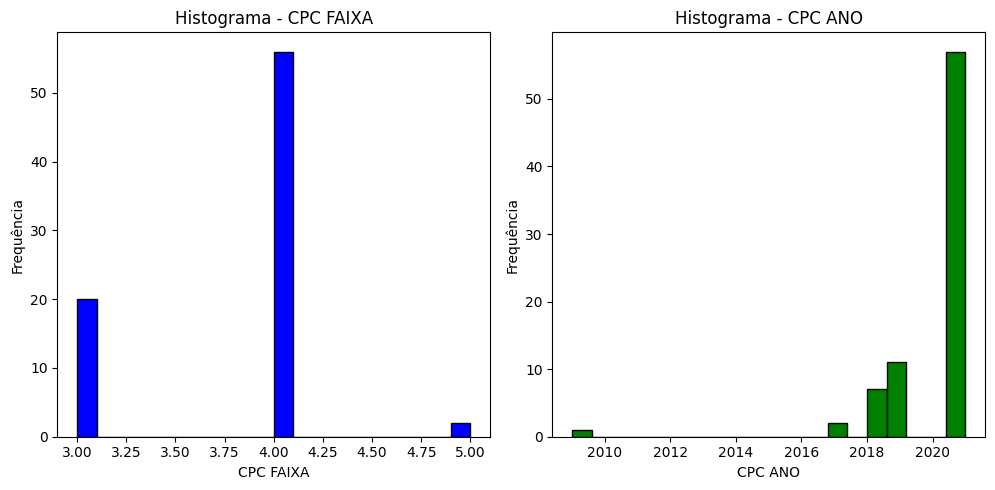

In [ ]:
cpc_continuo = df['CPC FAIXA']
cpc_ano = df['CPC ANO']

plt.figure(figsize=(15, 5))

# Histograma para CPC CONTINUO
plt.subplot(1, 3, 1)
plt.hist(cpc_continuo, bins=20, color='blue', edgecolor='black')
plt.title('Histograma - CPC FAIXA')
plt.xlabel('CPC FAIXA')
plt.ylabel('Frequência')

# Histograma para CPC ANO
plt.subplot(1, 3, 2)
plt.hist(cpc_ano, bins=20, color='green', edgecolor='black')
plt.title('Histograma - CPC ANO')
plt.xlabel('CPC ANO')
plt.ylabel('Frequência')

# Ajusta o layout para evitar sobreposição
plt.tight_layout()

# Exibe
plt.show()

<function matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)>

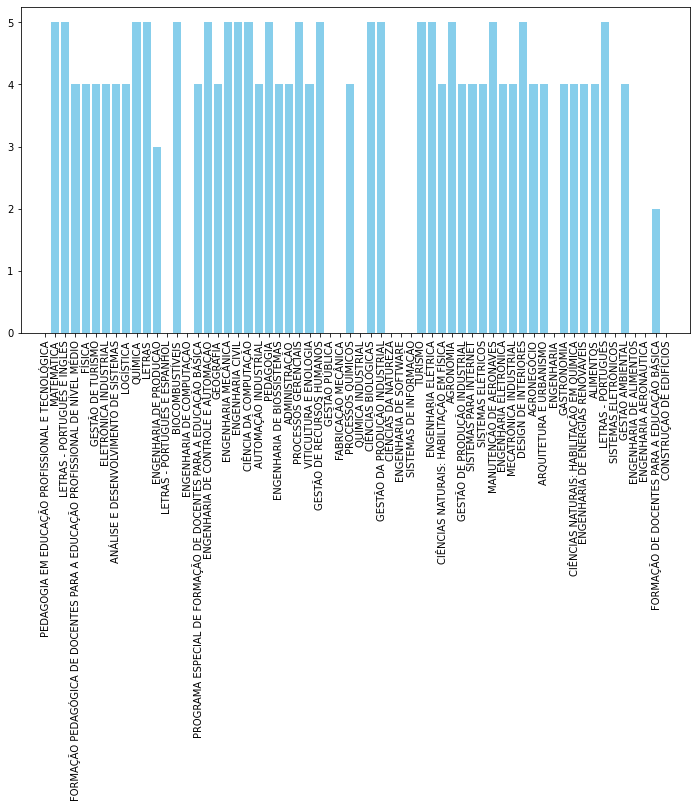

In [ ]:
# ExtraI as colunas 'VALOR CC' e 'CURSOS' do DataFrame df
valor_cc = df['VALOR CC']
cursos = df['NOME DO CURSO']

# Cria uma figura para o gráfico com o tamanho especificado
plt.figure(figsize=(12, 6))

# Cria barras para 'VALOR CC' no gráfico usando a cor 'skyblue'
plt.bar(cursos, valor_cc, color='skyblue', label='VALOR CC')

# Rotaciona os rótulos no eixo x para melhorar a legibilidade
plt.xticks(rotation=90)

plt.title

In [ ]:
# A linha abaixo cria uma série contendo a contagem de valores únicos na coluna 'CPC FAIXA' do DataFrame df.
contagem = df['CPC FAIXA'].value_counts()

print(contagem)

4    56
3    20
5     2
Name: CPC FAIXA, dtype: int64


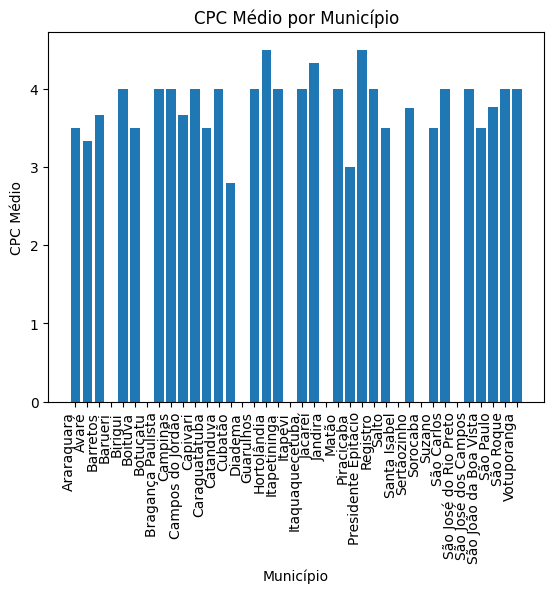

In [ ]:
# Vai agrupar por município e calcular a média do CPC
dados_agrupados = df.groupby('MUNICIPIO')['CPC FAIXA'].mean().reset_index()

#Plotagem
plt.bar(dados_agrupados['MUNICIPIO'], dados_agrupados['CPC FAIXA'])
plt.xlabel('Município')
plt.ylabel('CPC Médio')
plt.title('CPC Médio por Município')
plt.xticks(rotation=90, ha='right')
plt.show()

## 2. Visualização de Dados ENADE

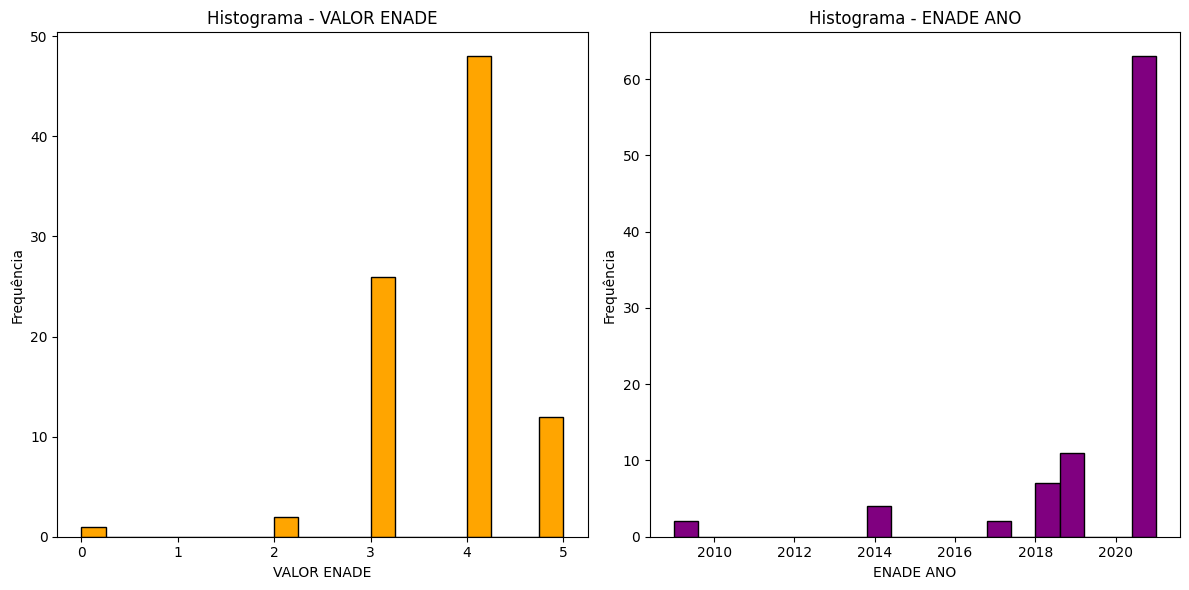

In [ ]:
valor_enade = df['VALOR ENADE']
enade_ano = df['ENADE ANO']

plt.figure(figsize=(12, 6))

# Histograma para VALOR ENADE
plt.subplot(1, 2, 1)
plt.hist(valor_enade, bins=20, color='orange', edgecolor='black')
plt.title('Histograma - VALOR ENADE')
plt.xlabel('VALOR ENADE')
plt.ylabel('Frequência')

# Histograma para ENADE ANO
plt.subplot(1, 2, 2)
plt.hist(enade_ano, bins=20, color='purple', edgecolor='black')
plt.title('Histograma - ENADE ANO')
plt.xlabel('ENADE ANO')
plt.ylabel('Frequência')

plt.tight_layout()

plt.show()

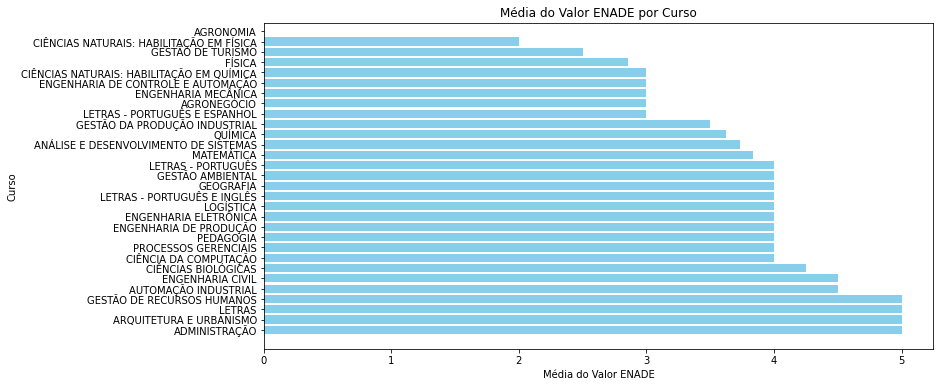

In [ ]:
# Variáveis para a análise
cursos = df['NOME DO CURSO']
valor_enade = df['VALOR ENADE']

# Cria um DataFrame com as duas variáveis
df_relacao_cursos_enade = pd.DataFrame({'Curso': cursos, 'Valor ENADE': valor_enade})

# Calcula a média do Valor ENADE para cada curso
media_enade_por_curso = df_relacao_cursos_enade.groupby('Curso')['Valor ENADE'].mean().reset_index()

# Ordena os cursos pela média do Valor ENADE
media_enade_por_curso = media_enade_por_curso.sort_values(by='Valor ENADE', ascending=False)

# Cria um gráfico de barras
plt.figure(figsize=(12, 6))
plt.barh(media_enade_por_curso['Curso'], media_enade_por_curso['Valor ENADE'], color='skyblue')
plt.title('Média do Valor ENADE por Curso')
plt.xlabel('Média do Valor ENADE')
plt.ylabel('Curso')
plt.show()

In [ ]:
# Vai agrupar os dados por município e calcular a média do VALOR ENADE para cada município
resultado_por_municipio = df.groupby('MUNICIPIO')['VALOR ENADE'].mean()

print(resultado_por_municipio)

MUNICIPIO
Araraquara               3.500000
Avaré                    3.500000
Barretos                 3.500000
Birigui                  3.500000
Boituva                  3.500000
Bragança Paulista        4.000000
Campinas                 4.000000
Campos do Jordão         3.666667
Capivari                 4.000000
Caraguatatuba            3.750000
Catanduva                3.500000
Cubatão                  3.666667
Guarulhos                4.000000
Hortolândia              4.000000
Itapetininga             3.500000
Itaquaquecetuba          4.000000
Jacareí                  4.500000
Matão                    3.000000
Piracicaba               2.666667
Presidente Epitácio      4.000000
Registro                 3.000000
Salto                    4.000000
Sertãozinho              3.666667
Suzano                   4.000000
São Carlos               4.000000
São José dos Campos      4.000000
São João da Boa Vista    3.000000
São Paulo                4.066667
São Roque                4.333333
Votu

In [ ]:
# A linha abaixo cria uma série contendo a contagem de valores únicos na coluna 'VALOR ENADE' do DataFrame df.
contagem = df['VALOR ENADE'].value_counts()

print(contagem)

VALOR ENADE
4.0    48
3.0    26
5.0    12
2.0     2
0.0     1
Name: count, dtype: int64


## 3. Visualização de Dados CC

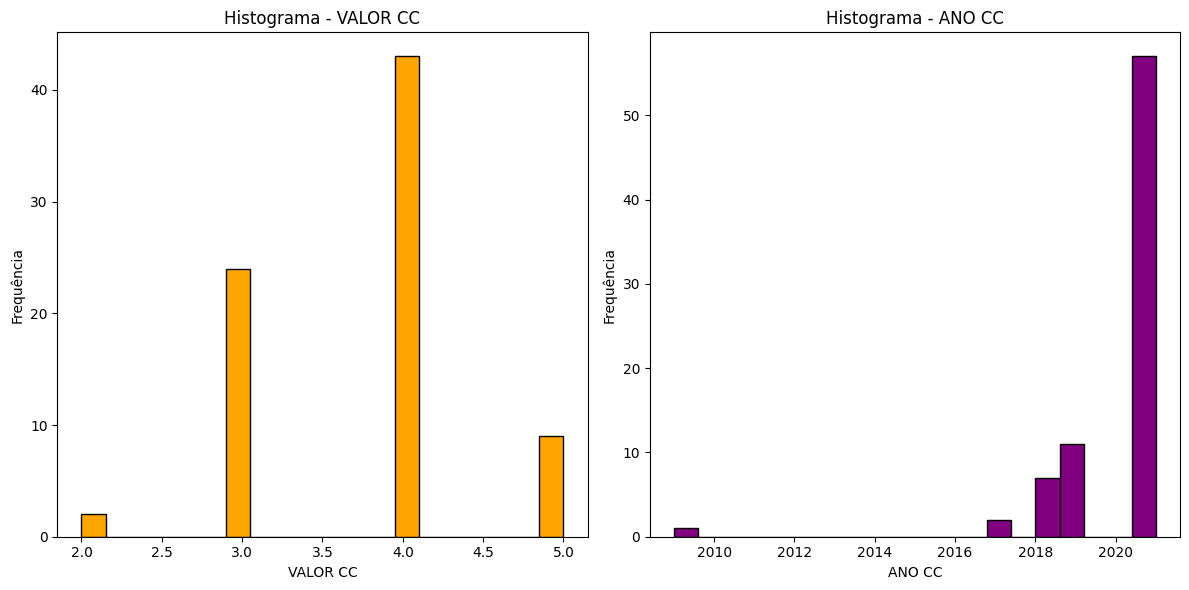

In [ ]:
# Variáveis para análise
valor_CC = df['VALOR CC']
CC_ano = df['ANO CC']

# Configuração da figura para os subplots
plt.figure(figsize=(12, 6))

# Subplot 1 - Histograma para VALOR CC
plt.subplot(1, 2, 1)  # 1 linha, 2 colunas, primeiro subplot
plt.hist(valor_CC, bins=20, color='orange', edgecolor='black')  # Cria o histograma
plt.title('Histograma - VALOR CC')  # Adiciona título ao subplot
plt.xlabel('VALOR CC')  # Adiciona rótulo ao eixo x
plt.ylabel('Frequência')  # Adiciona rótulo ao eixo y

# Subplot 2 - Histograma para ANO CC
plt.subplot(1, 2, 2)  # 1 linha, 2 colunas, segundo subplot
plt.hist(CC_ano, bins=20, color='purple', edgecolor='black')  # Cria o histograma
plt.title('Histograma - ANO CC')  # Adiciona título ao subplot
plt.xlabel('ANO CC')  # Adiciona rótulo ao eixo x
plt.ylabel('Frequência')  # Adiciona rótulo ao eixo y

# Ajuste de layout para evitar sobreposição de rótulos
plt.tight_layout()

# Mostra a figura
plt.show()

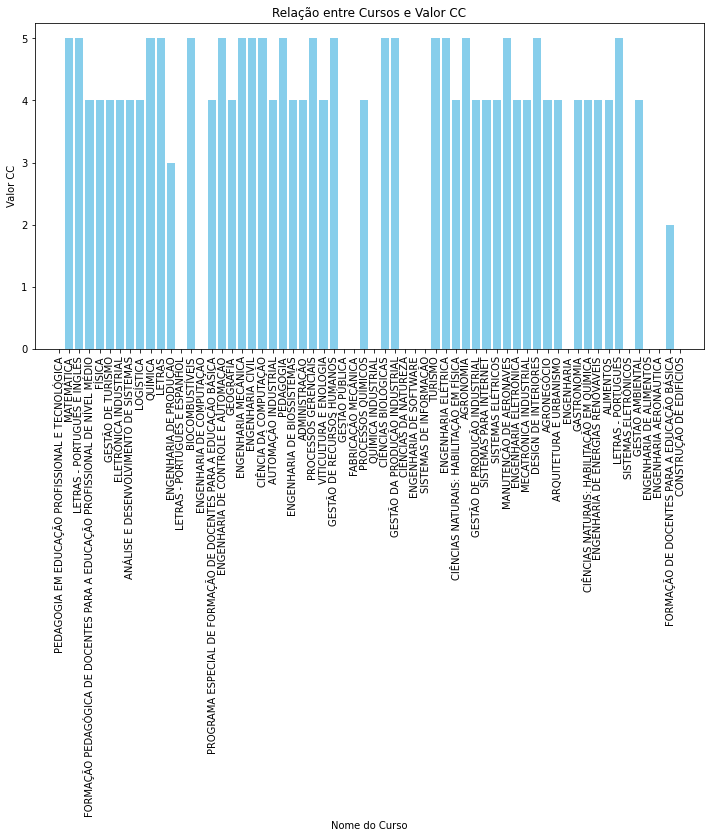

In [ ]:
# Extrai as variáveis necessárias para a análise
cursos = df['NOME DO CURSO']
valor_cc = df['VALOR CC']

# Cria um gráfico de barras com os cursos no eixo x e os valores de CC no eixo y
plt.figure(figsize=(12, 6))
plt.bar(cursos, valor_cc, color='skyblue')

# Rotaciona os rótulos do eixo x para melhor legibilidade
plt.xticks(rotation=90)

# Adiciona um título ao gráfico
plt.title('Relação entre Cursos e Valor CC')

# Adiciona rótulos aos eixos x e y
plt.xlabel('Nome do Curso')
plt.ylabel('Valor CC')

plt.show()

In [ ]:
contagem = df['VALOR CC'].value_counts()
print(contagem)

4    54
5    15
3     8
2     1
Name: VALOR CC, dtype: int64


In [ ]:
# Agrupa o DataFrame df pela coluna 'MUNICIPIO' e calcula a média da coluna 'VALOR CC' para cada município
cc_por_municipio = df.groupby('MUNICIPIO')['VALOR CC'].mean().reset_index()

print(cc_por_municipio)

                MUNICIPIO  VALOR CC
0              Araraquara  4.000000
1                   Avaré  4.000000
2                Barretos  4.000000
3                 Birigui  4.000000
4                 Boituva  4.500000
5       Bragança Paulista  3.500000
6                Campinas  4.000000
7        Campos do Jordão  4.333333
8                Capivari  4.000000
9           Caraguatatuba  4.000000
10              Catanduva  4.000000
11                Cubatão  4.000000
12              Guarulhos  3.500000
13            Hortolândia  4.000000
14           Itapetininga  4.000000
15        Itaquaquecetuba  5.000000
16                Jacareí  4.500000
17                  Matão  4.000000
18             Piracicaba  4.000000
19    Presidente Epitácio  5.000000
20               Registro  4.000000
21                  Salto  2.500000
22            Sertãozinho  4.000000
23                 Suzano  4.500000
24             São Carlos  3.500000
25    São José dos Campos  4.500000
26  São João da Boa Vista  4



## Visualização das 3 Variaveis juntas

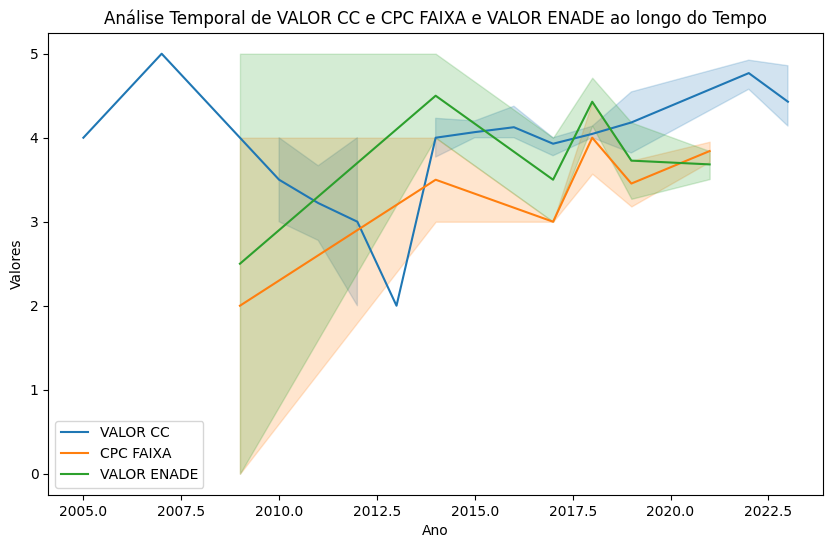

In [ ]:
# Configurando o tamanho da figura
plt.figure(figsize=(10, 6))

# Plotando as linhas para VALOR CC, CPC FAIXA e VALOR ENADE
sns.lineplot(data=df, x='ANO CC', y='VALOR CC', label='VALOR CC')  # Linha para VALOR CC
sns.lineplot(data=df, x='CPC ANO', y='CPC FAIXA', label='CPC FAIXA')  # Linha para CPC FAIXA
sns.lineplot(data=df, x='ENADE ANO', y='VALOR ENADE', label='VALOR ENADE')  # Linha para VALOR ENADE

# Adicionando rótulos aos eixos x e y, e um título ao gráfico
plt.xlabel('Ano')  # Rótulo do eixo x
plt.ylabel('Valores')  # Rótulo do eixo y
plt.title('Análise Temporal de VALOR CC e CPC FAIXA e VALOR ENADE ao longo do Tempo')  # Título do gráfico

# Adicionando a legenda ao gráfico
plt.legend()

# Exibindo o gráfico
plt.show()

In [ ]:
# Agrupe o DataFrame df pelos valores únicos na coluna 'GRAU' e, em seguida, calcule estatísticas para as colunas especificadas.
estatisticas_por_grau = df.groupby('GRAU').agg({
    'VALOR CC': ['mean', 'median', 'std'],  # Média, mediana e desvio padrão para 'VALOR CC'
    'VALOR ENADE': ['mean', 'median', 'std'],  # Média, mediana e desvio padrão para 'VALOR ENADE'
    'CPC FAIXA': ['mean', 'median', 'std']  # Média, mediana e desvio padrão para 'CPC FAIXA'
}).reset_index()  # Redefina os índices para tornar 'GRAU' uma coluna novamente

print(estatisticas_por_grau)

           GRAU  VALOR CC                  VALOR ENADE                   \
                     mean median       std        mean median       std   
0   Bacharelado  4.000000    4.0  0.603023    4.000000    4.0  0.852803   
1  Licenciatura  4.282051    4.0  0.455881    3.615385    4.0  0.673380   
2   Tecnológico  3.777778    4.0  0.640513    3.851852    4.0  0.601518   

  CPC FAIXA                   
       mean median       std  
0  3.750000    4.0  0.753778  
1  3.871795    4.0  0.338688  
2  3.629630    4.0  0.492103  


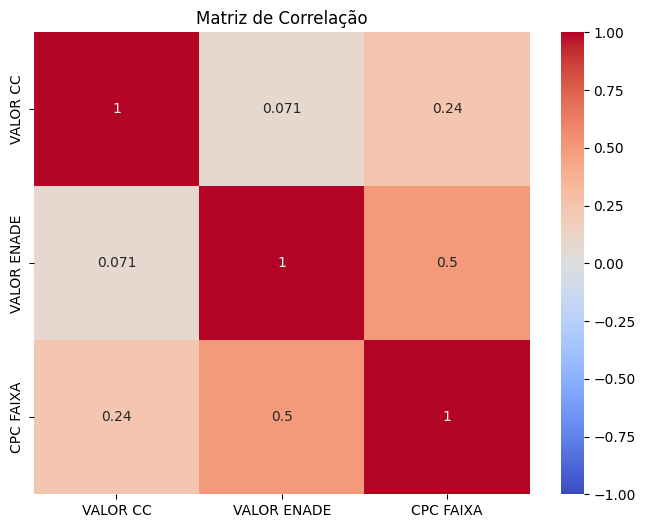

In [ ]:
# Lista das variáveis a serem analisadas na matriz de correlação
variaveis = ['VALOR CC', 'VALOR ENADE', 'CPC FAIXA']

# Calcula a matriz de correlação entre as variáveis selecionadas
matriz_correlacao = df[variaveis].corr()

# Cria uma figura para o gráfico de heatmap com o tamanho especificado
plt.figure(figsize=(8, 6))

# Cria um heatmap com anotações, usando a paleta de cores 'coolwarm'
# A escala de cores varia de -1 a 1, indicando correlações negativas a positivas
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

plt.title('Matriz de Correlação')
plt.show()

# MACHINE LEARNING - DESEMPENHO

## REGRESSÃO LINEAR ENADE



In [ ]:
dados_interesse_enade = df[['VALOR ENADE', 'ENADE ANO']]

# Remover linhas com valores nulos, se necessário
dados_interesse_enade = dados_interesse_enade.dropna()

In [ ]:
# Dividir os dados em conjuntos de treino e teste
X = dados_interesse_enade[['ENADE ANO']]
y = dados_interesse_enade['VALOR ENADE']
X_train_enade, X_test_enade, y_train_enade, y_test_enade = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Criar o modelo de regressão linear
model_enade = LinearRegression()

In [ ]:
# Treinar o modelo
model_enade.fit(X_train_enade, y_train_enade)

LinearRegression()

In [ ]:
# Fazer previsões no conjunto de teste
y_pred_enade = model_enade.predict(X_test_enade)

In [ ]:
# Avaliar o desempenho do modelo
mse_enade = mean_squared_error(y_test_enade, y_pred_enade)
print(f'Mean Squared Error para VALOR ENADE: {mse_enade}')

Mean Squared Error para VALOR ENADE: 0.6331347027615535


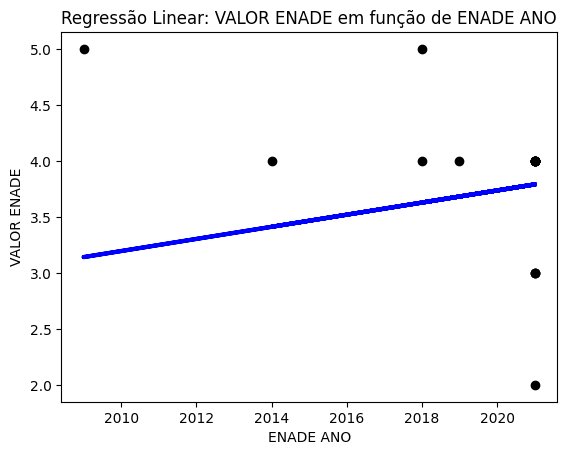

In [ ]:
# Visualizar a regressão

# Scatter plot dos dados de teste
plt.scatter(X_test_enade, y_test_enade, color='black')

# Linha de regressão com os dados preditos
plt.plot(X_test_enade, y_pred_enade, color='blue', linewidth=3)

# Adicionando rótulos aos eixos x e y
plt.xlabel('ENADE ANO')
plt.ylabel('VALOR ENADE')

# Adicionando um título ao gráfico
plt.title('Regressão Linear: VALOR ENADE em função de ENADE ANO')

plt.show()

## REGRESSÃO LINEAR CC

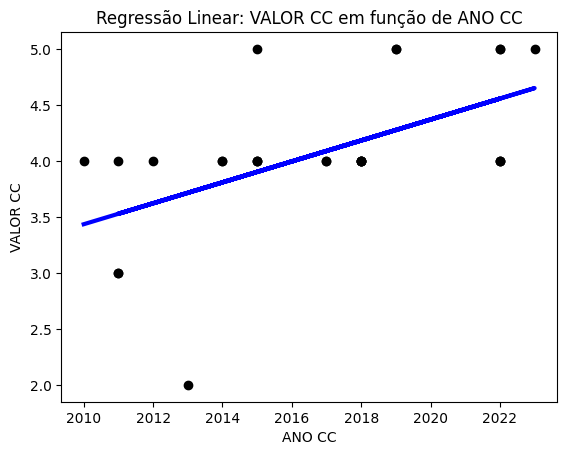

In [ ]:
# Seleciona as colunas de interesse (ANO CC e VALOR CC) do DataFrame df
dados_interesse_cc = df[['ANO CC', 'VALOR CC']]

# Remove linhas com valores faltantes (NaN)
dados_interesse_cc = dados_interesse_cc.dropna()

# Separa as features (X) e o alvo (y)
X = dados_interesse_cc[['ANO CC']]
y = dados_interesse_cc['VALOR CC']

# Divide o conjunto de dados em conjuntos de treino e teste
X_train_cc, X_test_cc, y_train_cc, y_test_cc = train_test_split(X, y, test_size=0.2, random_state=42)

# Cria um modelo de Regressão Linear
model_cc = LinearRegression()

# Treina o modelo com os dados de treino
model_cc.fit(X_train_cc, y_train_cc)

# Faz previsões usando os dados de teste
y_pred_cc = model_cc.predict(X_test_cc)

# Plota o gráfico de dispersão (pontos reais)
plt.scatter(X_test_cc, y_test_cc, color='black')

# Plota a linha da regressão linear (pontos previstos)
plt.plot(X_test_cc, y_pred_cc, color='blue', linewidth=3)

plt.xlabel('ANO CC')
plt.ylabel('VALOR CC')
plt.title('Regressão Linear: VALOR CC em função de ANO CC')
plt.show()

## REGRESSÃO LINEAR CPC





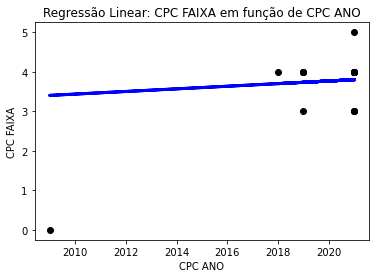

In [ ]:
# Seleciona as colunas de interesse (CPC ANO e CPC FAIXA) do DataFrame df
dados_interesse_cpc = df[['CPC ANO', 'CPC FAIXA']]

# Remove linhas com valores faltantes (NaN)
dados_interesse_cpc = dados_interesse_cpc.dropna()

# Separa as features (X) e o alvo (y)
X = dados_interesse_cpc[['CPC ANO']]
y = dados_interesse_cpc['CPC FAIXA']

# Divide o conjunto de dados em conjuntos de treino e teste
X_train_cpc, X_test_cpc, y_train_cpc, y_test_cpc = train_test_split(X, y, test_size=0.2, random_state=42)

# Cria um modelo de Regressão Linear
model_cpc = LinearRegression()

# Treina o modelo com os dados de treino
model_cpc.fit(X_train_cpc, y_train_cpc)

# Faz previsões usando os dados de teste
y_pred_cpc = model_cpc.predict(X_test_cpc)

# Plota o gráfico de dispersão (pontos reais)
plt.scatter(X_test_cpc, y_test_cpc, color='black')

# Plota a linha da regressão linear (pontos previstos)
plt.plot(X_test_cpc, y_pred_cpc, color='blue', linewidth=3)

plt.xlabel('CPC ANO')
plt.ylabel('CPC FAIXA')
plt.title('Regressão Linear: CPC FAIXA em função de CPC ANO')
plt.show()

## COMPARAÇÃO ENTRE AS 3 VARIAVEIS - REGRESSÃO LINEAR



MSE para VALOR ENADE: 0.606803705218063
MSE para VALOR CC: 0.16987955619779882
MSE para CPC FAIXA: 0.28798931013154977
O melhor modelo tem MSE: 0.16987955619779882


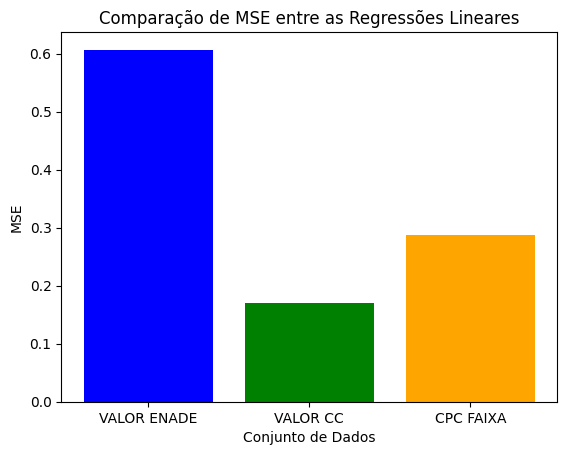

In [ ]:
# Exibe os valores de MSE
print(f'MSE para VALOR ENADE: {mse_enade}')
print(f'MSE para VALOR CC: {mse_cc}')
print(f'MSE para CPC FAIXA: {mse_cpc}')

# Compara os valores de MSE
#A variável melhor_modelo armazena o menor valor entre os MSEs dos três modelos,
#identificando assim qual modelo tem o desempenho mais favorável.
melhor_modelo = min(mse_enade, mse_cc, mse_cpc)
print(f'O melhor modelo tem MSE: {melhor_modelo}')

# Exibe gráfico comparativo
plt.bar(['VALOR ENADE', 'VALOR CC', 'CPC FAIXA'], [mse_enade, mse_cc, mse_cpc], color=['blue', 'green', 'orange'])
plt.xlabel('Conjunto de Dados')
plt.ylabel('MSE')
plt.title('Comparação de MSE entre as Regressões Lineares')
plt.show()

### Conclusão

- Os resultados indicam que o modelo de regressão linear é eficaz para prever o 'VALOR CC', pois possui o valor mais baixo do MSE.

- A análise temporal mostra tendências semelhantes entre as variáveis ao longo dos anos, destacando o período de 2017 a 2020 como favorável.

- O curso de Administração se destaca nas três variáveis.

- A distribuição entre municípios é equilibrada.